In [138]:
# Importing libraries and modules
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import scale 
from sklearn.preprocessing import LabelEncoder 
from sklearn import svm 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [139]:
# Importing datasets
X_train=pd.read_csv('loan prediction/X_train.csv')
Y_train=pd.read_csv('loan prediction/Y_train.csv')

# Importing testing data set
X_test=pd.read_csv('loan prediction/X_test.csv')
Y_test=pd.read_csv('loan prediction/Y_test.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8AE6B36A0>,
      dtype=object)

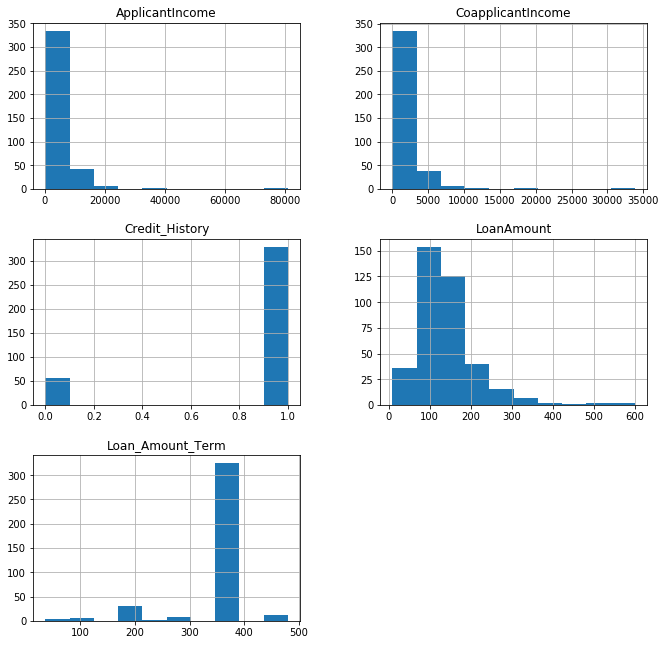

In [140]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [141]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],np.ravel(Y_train, order='C'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [142]:
accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))

0.6145833333333334

In [143]:
Y_train.Target.value_counts()/Y_train.Target.count()

Y    0.705729
N    0.294271
Name: Target, dtype: float64

In [144]:
Y_test.Target.value_counts()/Y_test.Target.count()

Y    0.635417
N    0.364583
Name: Target, dtype: float64

# We are more likely to get a better prediction by guessing than using our model. This might be because of the wide range of difference across our columns so we can normalize using min-max normalizer 

In [145]:
minmax=MinMaxScaler()
X_train_minmax=minmax.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=minmax.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [146]:
# Fit data again to KNN algorithm 

knn.fit(X_train_minmax,Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [147]:
# Checking the model's accuracy again, after normalization 
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.75

In [148]:
# Testing on LogisticRegression
lr=LogisticRegression(penalty='l2',C=0.01)

In [149]:
lr.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],np.ravel(Y_train, order='C'))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
# Calculate accuracy score on not normalized data 
accuracy_score(Y_test,lr.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))

0.6145833333333334

In [151]:
# fit model again, to normalized data 
lr.fit(X_train_minmax, Y_train.values.ravel())

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
# Calculate accuracy score again, after normalization 
accuracy_score(Y_test,lr.predict(X_test_minmax))

0.6354166666666666

In [153]:
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [154]:
lr.fit(X_train_scale,Y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
accuracy_score(Y_test,lr.predict(X_test_scale))

0.75

In [156]:
# Importing LabelEncoder and initializing it
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
    # Using whole data to form an exhaustive list of levels
       data=X_train[col].append(X_test[col])
       le.fit(data.values)
       X_train[col]=le.transform(X_train[col])
       X_test[col]=le.transform(X_test[col])

In [157]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,13,1,0,0,0,0,4950,0.0,125,360,1,2
1,193,1,1,1,0,0,2882,1843.0,123,480,1,1
2,461,1,1,0,0,0,3000,3416.0,56,180,1,1
3,191,1,1,2,0,0,9703,0.0,112,360,1,2
4,300,1,1,0,0,0,2333,2417.0,136,360,1,2


# using SVM

In [158]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)
support.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
     verbose=0)

In [159]:
accuracy_score(Y_test, support.predict(X_test))

0.6458333333333334

In [162]:
support = svm.SVC(kernel='linear',random_state=0)
support.fit(X_train_norm,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [163]:
accuracy_score(Y_test, support.predict(X_test_norm))

0.75